In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge

## Random Forest Classifier

In [2]:
# import training & test data
sm_df = pd.read_csv('csv/data_resampled_SMOTE.csv')
# sme_df = pd.read_csv('csv/data_resampled_SMOTEENN.csv')
# smt_df = pd.read_csv('csv/data_resampled_SMOTETomek.csv')
test_df = pd.read_csv('csv/test.csv')

X_train_sm, y_train_sm = sm_df[sm_df.columns[1:]], sm_df[sm_df.columns[0]]
# X_train_sme, y_train_sme = sm_df[sme_df.columns[1:]], sm_df[sme_df.columns[0]]
# X_train_smt, y_train_smt = sm_df[smt_df.columns[1:]], sm_df[smt_df.columns[0]]

X_test, y_test = test_df[test_df.columns[1:]], test_df[test_df.columns[0]]

In [4]:
# https://www.geeksforgeeks.org/how-to-solve-overfitting-in-random-forest-in-python-sklearn/
from sklearn.ensemble import RandomForestClassifier

# add hyperparameter to prevent overfitting
rf = RandomForestClassifier(
    max_depth=8, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=10,
    random_state=20)

rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=8, max_leaf_nodes=10, min_samples_split=3,
                       n_estimators=30, random_state=20)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7734930020844855

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.797



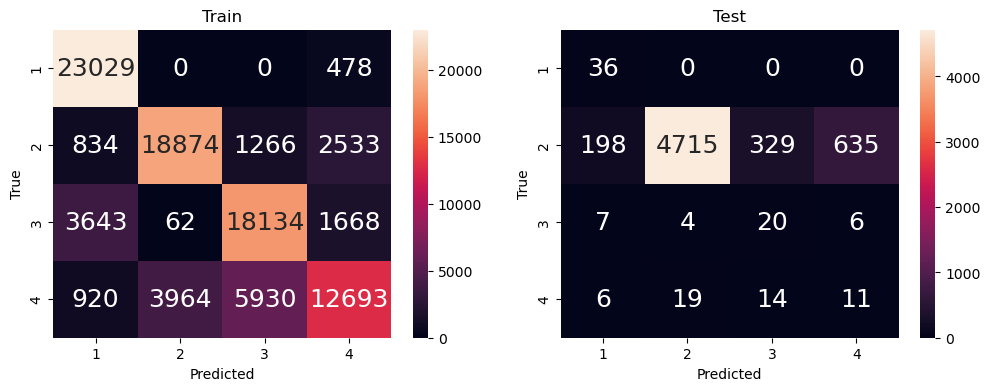

In [5]:
from sklearn.metrics import confusion_matrix

# Predict Response corresponding to Predictors
y_train_pred = rf.predict(X_train_sm)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train_sm, y_train_sm))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train_sm, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

labels = ['1', '2', '3', '4']
axes[0].set_title('Train')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True'); 
axes[0].xaxis.set_ticklabels(labels); 
axes[0].yaxis.set_ticklabels(labels);

axes[1].set_title('Test')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True'); 
axes[1].xaxis.set_ticklabels(labels); 
axes[1].yaxis.set_ticklabels(labels);

In [95]:
# https://www.geeksforgeeks.org/how-to-solve-overfitting-in-random-forest-in-python-sklearn/
from sklearn.ensemble import RandomForestClassifier

# add hyperparameter to prevent overfitting
rf1 = RandomForestClassifier(
    max_depth=8, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=10,
    random_state=20)

rf1.fit(X_train_sm, y_train_sm)

# Predict Response corresponding to Predictors
y_train_sm_pred = rf1.predict(X_train_sm)
y_test_sm_pred = rf1.predict(X_test)

train1_score = rf1.score(X_train_sm, y_train_sm)
test1_score = rf1.score(X_test, y_test)

train_score.append(train1_score)
test_score.append(test1_score)

In [96]:
rf2 = RandomForestClassifier(
    max_depth=8, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=10,
    random_state=20)
rf2.fit(X_train_sme, y_train_sme)

# Predict Response corresponding to Predictors
y_train_sme_pred = rf2.predict(X_train_sme)
y_test_sme_pred = rf2.predict(X_test)

train2_score = rf2.score(X_train_sme, y_train_sme)
test2_score = rf2.score(X_test, y_test)

train_score.append(train2_score)
test_score.append(test2_score)

In [98]:
rf3 = RandomForestClassifier(
    max_depth=8, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=10,
    random_state=20)
rf3.fit(X_train_smt, y_train_smt)

# Predict Response corresponding to Predictors
y_train_smt_pred = rf2.predict(X_train_smt)
y_test_smt_pred = rf2.predict(X_test)

train3_score = rf2.score(X_train_smt, y_train_smt)
test3_score = rf2.score(X_test, y_test)

train_score.append(train3_score)
test_score.append(test3_score)

		----------------------------------------------------------------------------------------------
Resampling	|SMOTE                         |SMOTEENN                      |SMOTETomek                    |
		----------------------------------------------------------------------------------------------
Train Accuracy:	|0.8017930829114732            |0.8022716637597311            |0.8022716637597311            |
Test Accuracy:	|0.7965                        |0.7971666666666667            |0.7971666666666667            |


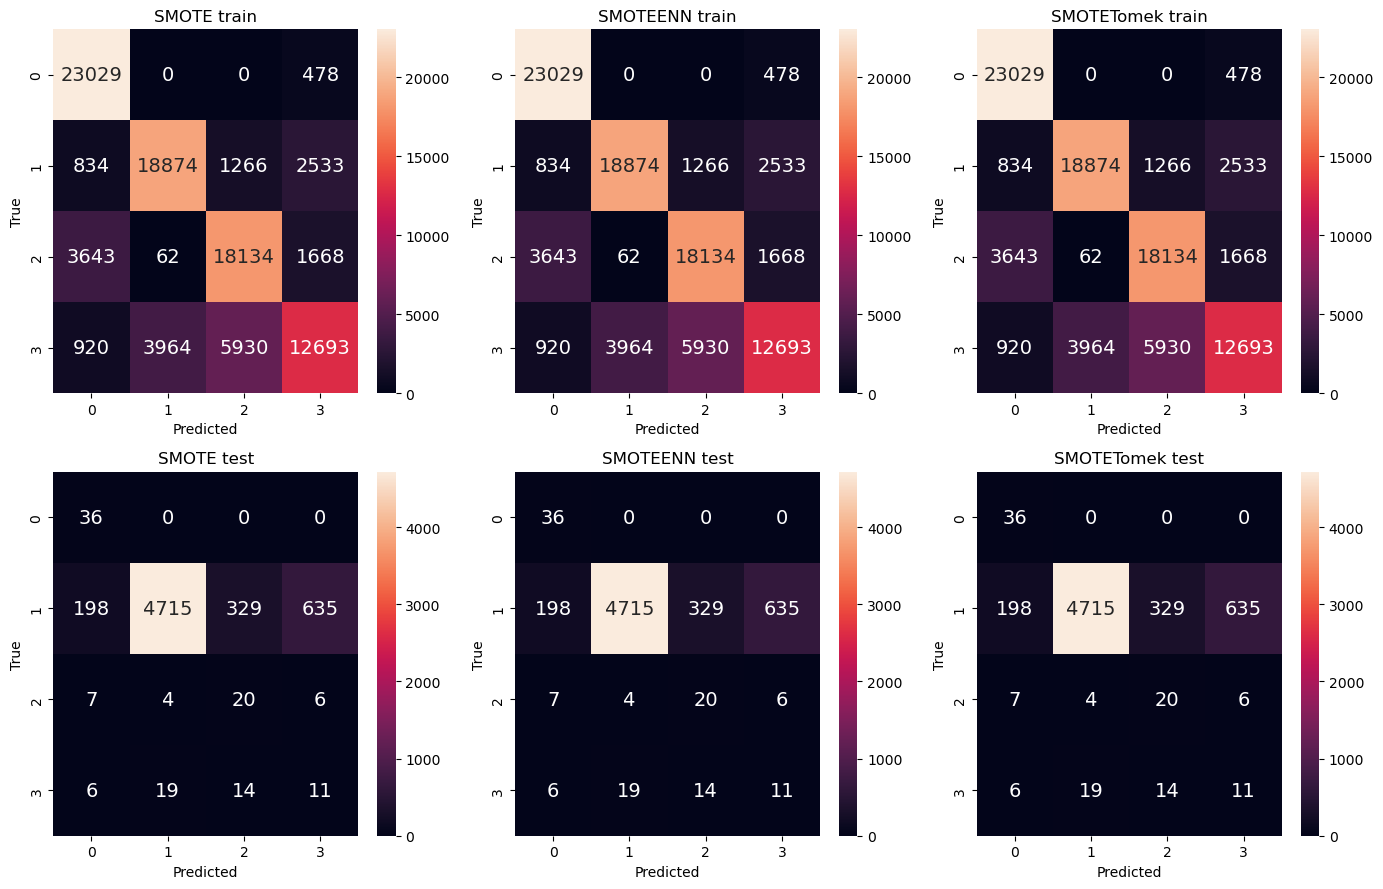

In [100]:
from sklearn.metrics import confusion_matrix


# print train and test score
col = ['SMOTE', 'SMOTEENN', 'SMOTETomek']

print('\t\t'+'-'*94)
print('Resampling\t|{:<30}|{:<30}|{:<30}|'.format(*col))
print('\t\t'+'-'*94)
print('Train Accuracy:\t|{:<30}|{:<30}|{:<30}|'.format(*train_score))
print('Test Accuracy:\t|{:<30}|{:<30}|{:<30}|'.format(*test_score))

# plot confusion matrix for train and test for all 3 resampling techniques
f, axes = plt.subplots(2, 3, figsize=(14, 9))

sb.heatmap(confusion_matrix(y_train_sm, y_train_sm_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0][0])
sb.heatmap(confusion_matrix(y_test, y_test_sm_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1][0])

sb.heatmap(confusion_matrix(y_train_sme, y_train_sme_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0][1])
sb.heatmap(confusion_matrix(y_test, y_test_sme_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1][1])

sb.heatmap(confusion_matrix(y_train_smt, y_train_smt_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0][2])
sb.heatmap(confusion_matrix(y_test, y_test_smt_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1][2])

labels = ['1', '2', '3', '4']
for i in range(2):
    for j in range(3):
        axes[i][j].xaxis_set_ticklabels=(labels)
        axes[i][j].yaxis_set_ticklabels=(labels)
        axes[i][j].set_xlabel('Predicted')
        axes[i][j].set_ylabel('True')
        if i == 0:
            axes[i][j].set_title(col[j]+' train')
        else:
            axes[i][j].set_title(col[j]+' test')

plt.tight_layout()